# Homework 2

## Problem 1.4

A friend comes to you with a learning problem. She says the target function $f$ is *completely* unknown, but she has 4000 data points. She is willing to pay you to solve her problem and produce for her a $g$ which approximates $f$. What is the best that you can promise her among the following:

a. After learning you will provide her with a $g$ that you will guarantee approximates $f$ well out of sample.
  
b. After learning you will provide her with a $g$, and with high probability the $g$ which you produce will approximate $f$ well out of sample
  
c. One of two things will happen.
  
  1. You will produce a hypothesis $g$;
    
  2. You will declare that you failed.
    
  
  If you do return a hypothesis $g$, then with high probability the $g$ which you produce will approximate $f$ well out of sample.
  

C. The reason is because even if we 4000 data points as $f$ is completely unknown we maybe cannot learn a particular $f$ but if we are using a reasonable hypothesis set $\mathcal{H}$ that gives us a good Hoeffding bound, our success or failure can be determined by the success or failure of fitting the training data.

## Problem 1.2

Consider the perceptron in two dimensions: $h(\mathbf{x}) = \text{sign}(\mathbf{w}^T \mathbf{x})$ where $\mathbf{w} = [w_0, w_1, w_2]^{T}$ and $\mathbf{x} = [1, x_1, x_2]^T$. Technically, $\mathbf{x}$ has three coordinates, but we call this perceptron two-dimensional because the first coordinate is fixed at 1.

a. Show that the regions on the plane where $h(\mathbf{x}) = +1$ and $h(\mathbf{x}) = -1$ are separated by a line. If we express this line by the equation $x_2 = ax_1 + b$ what are the slope $a$ and intercept $b$ in terms of $w_0, w_1, w_2$?
  
b. Draw a picture for the cases $\mathbf{w} = [1,2,3]^T$ and $\mathbf{w} = -[1,2,3]^T$
  

1. We see that $\mathbf{w}^T \mathbf{x} = w_0 + w_1 x_1 + w_2 x_2$. We know that when $h(\mathbf{x}) = +1$ is because $w_0 + w_1 x_1 + w_2 x_2 > 0$ and that when $h(\mathbf{x}) = -1$ is because $w_0 + w_1 x_1 + w_2 x_2 < 0$.
  We note that the two regions that we are describing had delimitation on the line $w_0 + w_1 x_1 + w_2 x_2 = 0$. (This is the equation of the line in normal form) 
  To pass this to the form that we know we say that
  
  $$
  w_0 + w_1 x_1 = -w_2 x_2
  $$$$
  -{w_0 \over w_2} - {w_1 \over w_2} x_1 = x_2
  $$
  
  So now we know the equivalent places for the equation $a = - w_1 / w_2$ and $b = -w_0 / w_2$.

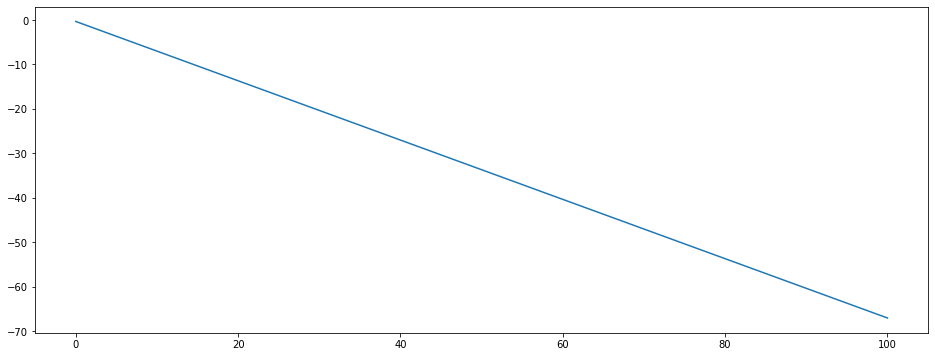

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
x = np.linspace(0, 100, 100)

# First case
a = -2.0/3.0
b = -1.0/3.0
y = list(map(lambda i: a*i + b, x))
plt.plot(x, y);

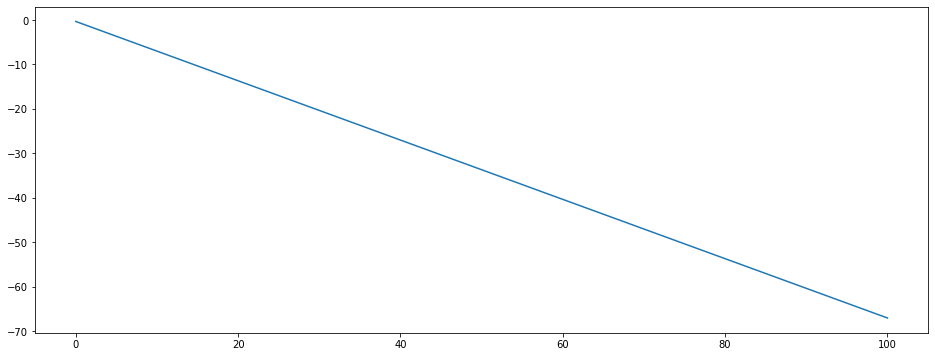

In [2]:
x = np.linspace(0, 100, 100)

# First case
a = -2.0/3.0
b = -1.0/3.0
y = list(map(lambda i: a*i + b, x))
plt.figure(figsize=(16,6))
plt.plot(x, y);

There are the same lines

## Problem 1.4

In Exercise 1.4, we use an artificial data set to study the perceptron learning algorithm. This problems leads you to explore the algorithm further with data sets of different sizes and dimensions.

1. Generate a linearly separable data set of size 20 as indicated in Exercise 1.4. Plot the examples $\{(x_n, y_n)\}$ as well as the target function $f$ on the plane. Be sure to mark the examples from different classes differently, and add labels to the axes of the plot.
  
2. Run the perceptron learning algorithm on the data set above. Report the number of updates that the algorithm takes before converging. Plot the examples $\{(x_n, y_n)\}$, the target function $f$, and the final hypothesis $g$ in the same figure. Comment wether $f$ is close to $g$.
  
3. Repeate everything in (b) with another randomly generated data set of size 20. Compare your results with (b).
  
4. Repeate everything in (b) with another randomly generated data set of size 100. Compare your results with (b).
  
5. Repeate everything in (b) with another randomly generated data set of size 1000. Compare your results with (b).
  
6. Modify the algorithm such that it takes $x_n \in \mathbb{R}^{10}$ instead of $\mathbb{R}^2$. Randomly generate a linearly separable data set of size 1000 with $x_n \in \mathbb{R}^{10}$ and feed the data set to the algorithm. How many updates does the algorithm take to converge?
  
7. Repeat the algorithm on the same data set as (f) for 100 expermients. In the iterations of each experiment, pick $\mathbf{x}(t)$ randomly instead of deterministically. Plot a histogram for the number of updates that the algorithm takes to converge.
  
8. Summarize your conclusions with respect to accuracy and running time as a function of $N$ and $d$.

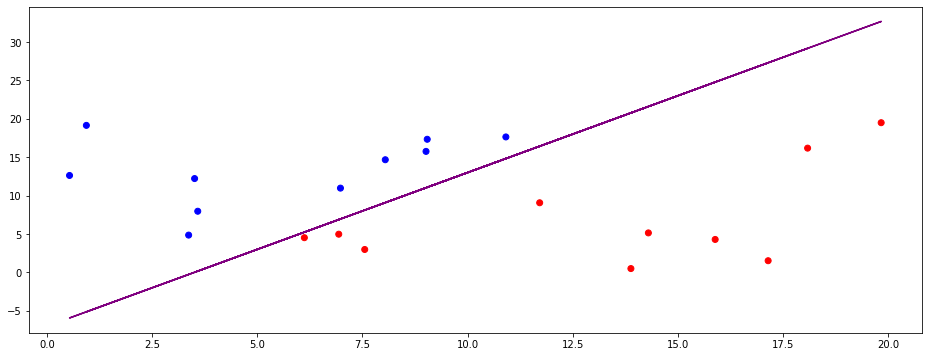

In [3]:
# lets say that our real f is
f = lambda x, y: 4*x - 2*y - 14
x = 20*np.random.random(20)
y = 20*np.random.random(20)
data_set = list(zip(x, y))
color = list(map(lambda e: 'r' if f(e[0], e[1]) > 0 else 'b', data_set))
plt.figure(figsize=(16,6))
plt.scatter(x,y, c=color)
y_l = list(map(lambda p: 2*p - 7, x))
plt.plot(x, y_l,c='purple');

In [4]:
import random

def check_convergence(data_set, color, w):
    for indx, point in enumerate(data_set):
        point = (1,) + point
        if np.dot(w, point) <= 0 and color[indx] == 'r':
            return False
        if np.dot(w, point) > 0 and color[indx] == 'b':
            return False
    return True

def perceptron_algo(data_set, color):
    w = np.random.random(len(data_set[0])+1)
    convergance = False
    counter = 0
    while not convergance and counter < 10E7:
        indx = random.randint(0, len(data_set) - 1)
        x = data_set[indx]
        c = color[indx]
        x = (1,) + x # add the space for the b
        if c == 'r' and np.dot(w, x) <= 0:
            w += np.array(x)
        if c == 'b' and np.dot(w, x) > 0:
            w -= np.array(x)
        convergance = check_convergence(data_set, color, w)
        counter += 1
    return w, counter

In [5]:
w, _ = perceptron_algo(data_set, color)

[ -2.35167971  19.88889759 -19.95451544]
0.9967116288396852 -0.1178520079906352


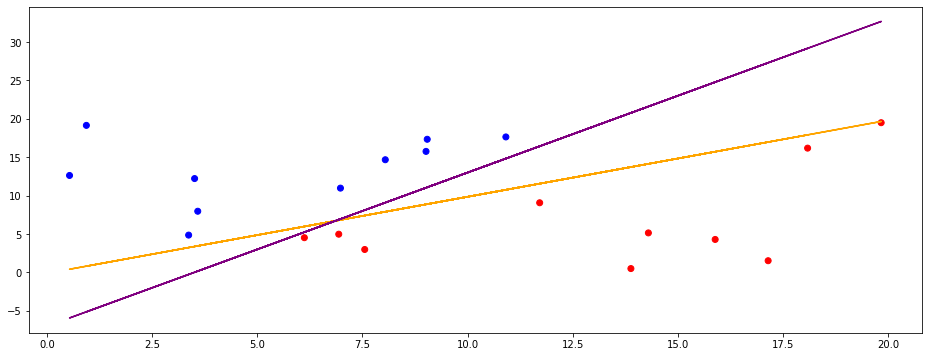

In [6]:
a = -w[1]/w[2]
b = -w[0]/w[2]
print(w)
print(a, b)
plt.figure(figsize=(16,6))
plt.scatter(x,y, c=color)
y_l = list(map(lambda p: 2*p - 7, x))
y_g = list(map(lambda p: a*p + b, x))
plt.plot(x, y_g, c='orange')
plt.plot(x, y_l,c='purple');

$f$ in purple and $g$ on orange. It's not retively close.

[-82.78484558  25.89838998 -16.77601603]
1.543774751694088 -4.934714263225446


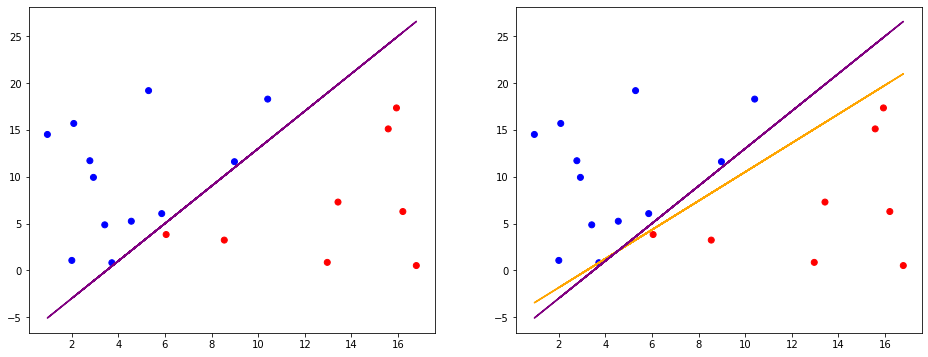

In [7]:
# 2
f = lambda x, y: 4*x - 2*y - 14
x = 20*np.random.random(20)
y = 20*np.random.random(20)
data_set = list(zip(x, y))
color = list(map(lambda e: 'r' if f(e[0], e[1]) > 0 else 'b', data_set))
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(x,y, c=color)
y_l = list(map(lambda p: 2*p - 7, x))

plt.plot(x, y_l,c='purple');

# Train
w, _ = perceptron_algo(data_set, color)

a = -w[1]/w[2]
b = -w[0]/w[2]
print(w)
print(a, b)
plt.subplot(122)
plt.scatter(x,y, c=color)
y_l = list(map(lambda p: 2*p - 7, x))
y_g = list(map(lambda p: a*p + b, x))

plt.plot(x, y_g, c='orange')
plt.plot(x, y_l,c='purple');

[-249.33732772   90.40864241  -51.93248998]
1.7408878806423627 -4.80118183870422


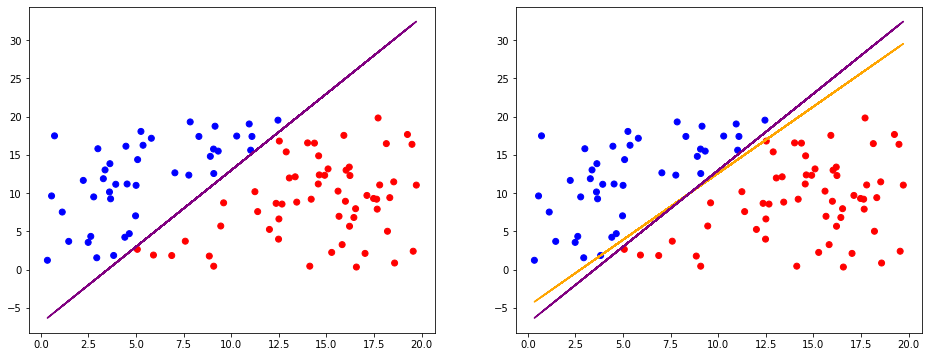

In [8]:
f = lambda x, y: 4*x - 2*y - 14
x = 20*np.random.random(100)
y = 20*np.random.random(100)
data_set = list(zip(x, y))
color = list(map(lambda e: 'r' if f(e[0], e[1]) > 0 else 'b', data_set))
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(x,y, c=color)
y_l = list(map(lambda p: 2*p - 7, x))

plt.plot(x, y_l,c='purple');

# Train
w, _ = perceptron_algo(data_set, color)

a = -w[1]/w[2]
b = -w[0]/w[2]
print(w)
print(a, b)
plt.subplot(122)
plt.scatter(x,y, c=color)
y_l = list(map(lambda p: 2*p - 7, x))
y_g = list(map(lambda p: a*p + b, x))

plt.plot(x, y_g, c='orange')
plt.plot(x, y_l,c='purple');

[-464.76042815  131.79343136  -65.50060902]
2.0120947475503765 -7.0955130818082734


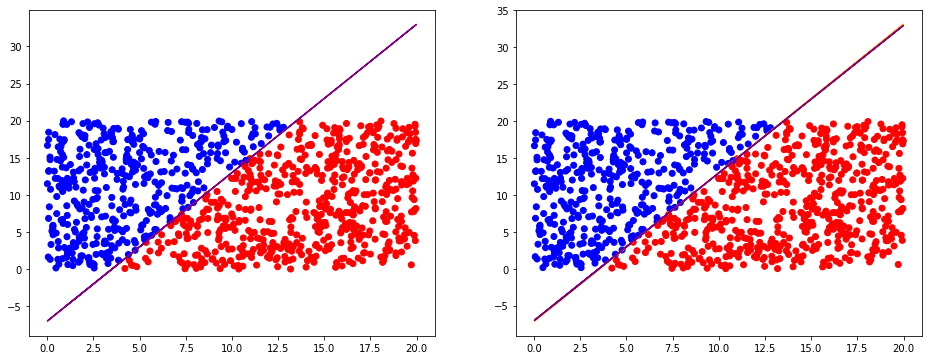

In [9]:
f = lambda x, y: 4*x - 2*y - 14
x = 20*np.random.random(1000)
y = 20*np.random.random(1000)
data_set = list(zip(x, y))
color = list(map(lambda e: 'r' if f(e[0], e[1]) > 0 else 'b', data_set))
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(x,y, c=color)
y_l = list(map(lambda p: 2*p - 7, x))

plt.plot(x, y_l,c='purple');

# Train
w, _ = perceptron_algo(data_set, color)

a = -w[1]/w[2]
b = -w[0]/w[2]
print(w)
print(a, b)
plt.subplot(122)
plt.scatter(x,y, c=color)
y_l = list(map(lambda p: 2*p - 7, x))
y_g = list(map(lambda p: a*p + b, x))

plt.plot(x, y_g, c='orange')
plt.plot(x, y_l,c='purple');

We can observe than comparing the size of the data set. The line gets closer to the original, having a greter data set helps find a more closer estimate of the real $f$

In [24]:
coefficients = 10*(2*np.random.random(11)-1)
def f(x):
    x = np.concatenate([(1,), x])
    return np.dot(coefficients, x)

In [25]:
x = [20*np.random.random(1000) for _ in range(10)]
data_set = list(zip(*x))
color = list(map(lambda e: 'r' if f(e) > 0 else 'b', data_set))

In [26]:
w, counter = perceptron_algo(data_set, color)

In [27]:
w

array([ -0.60321317,  31.90207513,  21.29767751, -28.1338003 ,
        -2.76030538,  12.15128796,  27.13311478,  25.06992128,
        -0.5986864 ,  14.44876297,  18.20329047])

In [28]:
coefficients

array([-6.04357071,  8.3762499 ,  6.97544065, -0.40977248, -6.01732124,
        0.66144075,  7.59698455,  7.62649375, -3.16908477,  6.21116647,
        4.41859901])

In [29]:
counter

4928

My algorithm already works randomly

  0%|          | 0/100 [00:00<?, ?it/s]

(array([20., 19., 19., 15., 10.,  7.,  4.,  1.,  4.,  1.]),
 array([   22. ,  1173.3,  2324.6,  3475.9,  4627.2,  5778.5,  6929.8,
         8081.1,  9232.4, 10383.7, 11535. ]),
 <BarContainer object of 10 artists>)

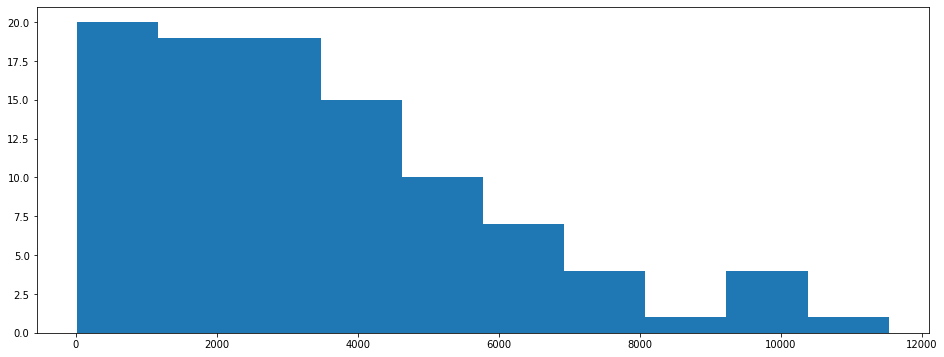

In [31]:
from tqdm.notebook import tqdm

counters = []
for _ in tqdm(range(100)):
    w, counter = perceptron_algo(data_set, color)
    counters.append(counter)
plt.figure(figsize=(16,6))
plt.hist(counters)

We notice that the accuracy of the model increase as $N \to \infty$, but the running time increase as well after all now you have to fit a lot more data points.
Also we obviously notice that as the dimensinality increases the accuracy of the model decreases (the curse dimensionality) and also the running time also increases (the curse of dimensionality)

## Problem 1.6

Consider a sample of 10 marbles drawn independently from a bin that holds red and green marbles. The probability of a red marble is $\mu$. For $\mu = 0.05$, $\mu = 0.5$, and $\mu = 0.8$, compute the probability of getting no red marbles $(\nu = 0)$ in the following cases

1. We draw only one such sample. Compute the probability that $\nu = 0$.
  
2. We draw 1000 independent samples. Compute the probability that (at least) one of the samples has $\nu = 0$
  
3. Repeat (2) for 1'000.000 independent samples.


In [32]:
from scipy.special import binom
  
def binomial(k, N, mu):
    return binom(N, k)* (mu**k) * (1 - mu)**(N - k)

# 1
print(binomial(0, 10, 0.05))
print(binomial(0, 10, 0.5))
print(binomial(0, 10, 0.8))

0.5987369392383787
0.0009765625
1.0239999999999978e-07


In [33]:
# 2
print(1 - binomial(1000, 1000, 1-binomial(0, 10, 0.05)))
print(1 - binomial(1000, 1000, 1-binomial(0, 10, 0.5)))
print(1 - binomial(1000, 1000, 1-binomial(0, 10, 0.8)))

1.0
0.623576201943276
0.00010239476257623004


In [34]:
# 3
print(1 - binomial(1000000, 1000000, 1-binomial(0, 10, 0.05)))
print(1 - binomial(1000000, 1000000, 1-binomial(0, 10, 0.5)))
print(1 - binomial(1000000, 1000000, 1-binomial(0, 10, 0.8)))

1.0
1.0
0.09733159268316072


## Problem 1.12

This problem investigates how changing the error measure can change the result of learning process. You have $N$ data points $y_1 \le \cdots \le y_N$ and wish to estimate a 'representative' value.

1. If your algorithm is to find the hypothesis $h$ that minimizes the in-sample sum of squared deviations,
  
  $$
  E_{in}(h) = \sum_{n=1}^N (h - y_n)^2,
  $$
  
  then show that your estimate will be the in-sample mean,
  
  $$
  h_{\text{mean}} = {1 \over N} \sum_{n = 1}^N y_n.
  $$
2. If your algorithm is to find the hypothesis $h$ that minimizes the in-sample sum of absolute deviations,
  
  $$
  E_{in} (h) = \sum_{n=1}^N | h - y_n |,
  $$
  
  then show that your estimate will be the in-sample median $h_{\text{med}}$, which is any value for which half the data points are at most $h_{\text{med}}$ and half the data points are at least $h_{\text{med}}$.
  
3. Suppose $y_N$ is perturbated to $y_N + \epsilon$, where $\epsilon \to \infty$. So, the single data point $y_N$ becomes an outlier. What happends to your two estimators $h_{\text{mean}}$ and $h_{\text{med}}$?
  

1. What you need to do is define the derivative and equal to 0. So,
  
  $$
  {dE_{in}(h) \over dh} = \sum_{n = 1}^N 2 (h - y_n) = 2 \sum_{n=1}^N h - 2\sum_{n = 1}^Ny_n = 0
  $$$$
  Nh = \sum_{n = 1}^{N} y_n \\
  h = {1 \over N} \sum_{n = 1} ^ N y_n
  $$
  
2. We note that the derivative in this case is
  
  $$
  {d E_{in}(h) \over dh} = \sum_{n = 1}^N {{h - y_n} \over |h - y_n|} = \sum_{n=1}^N \text{sign}(h - y_n)
  $$
  
  To reduce this quantity and to find the minimum, we have to have an equal number of $+1$ and $-1$ on the sum. So our $h$ of choice must been something that divides the data points in two parts of the same size. This is $h$ must be the median.
  
3. We notice that $h_{\text{mean}} \to \infty$ as $e \to \infty$, but the median converges if we just create one outlier. So we conclude that the median is most robust estimator in respect with outliers.

## Problem 1.9 (Found the solution but didn't know how to do it myself)
In this problem, we derive a form of the law of large number that has an exponential bound, called the *Chernoff bound*. We focus on the simple case of flippling a fair coin, and use an approach similar to Problem 1.8

1. Let $t$ be a (finite) random variable, $\alpha$ be a positive constant, and $s$ be a positive parameter. If $T(s) = \mathbb{E}_t (e^{st})$, prove that
  
  $$
  \mathbb{P}[t \ge \alpha] \le e^{-s\alpha}T(s).
  $$
  
  [Hint $e^{st}$ is monotonically increasing in t]
  
2. Let $u_1, \dots, u_N$ be i.i.d random variables, and let $u = {1 \over N} \sum_{n=1}^N u_n$. If $U(s) = \mathbb{E}_{u_n}(e^{su_n})$ (for any $n$), prove that
  
  $$
  \mathbb{P}[u \ge \alpha] \le (e^{-s\alpha}U(s))^N.
  $$
  
3. Suppose $\mathbb{P}[u_n = 0] = \mathbb{P}[u_n = 1] = {1 \over 2}$ (fair coin). Evaluate $U(s)$ as a function of $s$, and minimize $e^{-s\alpha}U(s)$ with respect to $s$ for a fixed $\alpha$, $0 \lt \alpha \lt 1$.
  
4. Conclude in (3) that, for $0 \lt \epsilon \lt {1 \over 2}$,
  
  $$
  \mathbb{P}[u \ge \mathbb{E}(u) + \epsilon] \le 2^{-\beta N},
  $$
  
  where $\beta = 1 + ({1 \over 2} + \epsilon) \log_2 ({1 \over 2} - \epsilon) \log_2({1 \over 2} - \epsilon)$ and $\mathbb{E}(u) = {1 \over 2}$. Show that $\beta \gt 0$, hence the bound is exponentially decreasing in $N$.